In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi

from skimage.feature import canny
from skimage.draw import polygon

In [2]:
sample_image = np.zeros((500,500), dtype=np.double)

In [3]:
poly = np.array(((200,200),
                (150,200),
                (150,300),
                (250,300),
                (350,200)))

rr, cc = polygon(poly[:, 0], poly[:, 1], sample_image.shape)

sample_image[rr,cc] = 1

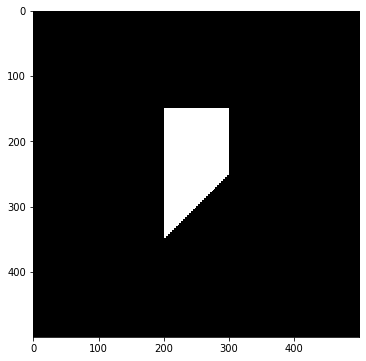

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(sample_image, cmap='gray')

In [5]:
#adding noise the the image
im = ndi.gaussian_filter(sample_image, 4)
im+=0.2*np.random.random(im.shape)

In [8]:
# large value of sigma means the detector is less sensitive to noise
edges1 = canny(im, sigma=1)
edges12 = canny(im, sigma=1.3)
edges2 = canny(im, sigma=1.7)

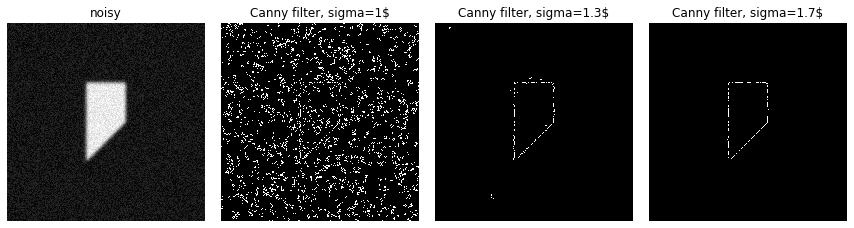

In [13]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12,4), sharex=True, sharey=True)

ax0.imshow(im, cmap='gray')
ax0.axis('off')
ax0.set_title('noisy')

ax1.imshow(edges1, cmap='gray')
ax1.axis('off')
ax1.set_title('Canny filter, sigma=1$')

ax2.imshow(edges12, cmap='gray')
ax2.axis('off')
ax2.set_title('Canny filter, sigma=1.3$')

ax3.imshow(edges2, cmap='gray')
ax3.axis('off')
ax3.set_title('Canny filter, sigma=1.7$')

fig.tight_layout()
plt.show()